In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load the dataset
data=pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.shape

(200, 5)

In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
#list of categorical column
categories={
   'Gender': ['Female', 'Male']
}

#encoding categorical variables

label_encoders={}
for column, classes in categories.items():
  le=LabelEncoder()
  le.classes_=np.array(classes)
  if column in data.columns:
    data[column]=le.fit_transform(data[column])
  label_encoders[column]=le

In [ ]:
#normalize features using standardscaler

scaler=StandardScaler()
data_scaled=scaler.fit_transform(data)
#displayed scaled data
print(pd.DataFrame(data_scaled,columns=data.columns).head())

   CustomerID    Gender       Age  Annual Income (k$)  Spending Score (1-100)
0   -1.723412  1.128152 -1.424569           -1.738999               -0.434801
1   -1.706091  1.128152 -1.281035           -1.738999                1.195704
2   -1.688771 -0.886405 -1.352802           -1.700830               -1.715913
3   -1.671450 -0.886405 -1.137502           -1.700830                1.040418
4   -1.654129 -0.886405 -0.563369           -1.662660               -0.395980


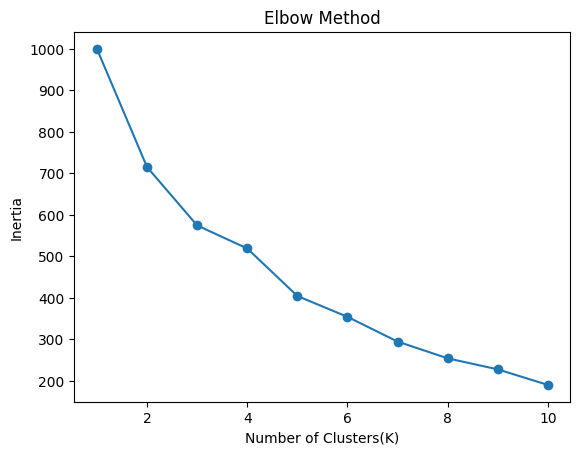

In [ ]:
#use elbow method to find the optimal number of clusters

inertia=[]
k_range=range(1,11)

for k in k_range:
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(data_scaled)
  inertia.append(kmeans.inertia_)

#plot the inertia values to find the elbow
plt.plot(k_range,inertia,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters(K)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Applying K-Means clustering with k=2(example value)

k = 3

# Create a KMeans model with 3 clusters
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model on the scaled data and assign cluster labels
data['cluster'] = kmeans.fit_predict(data_scaled)

# Display the first few rows including the assigned clusters
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       1   19                  15                      39   
1           2       1   21                  15                      81   
2           3       0   20                  16                       6   
3           4       0   23                  16                      77   
4           5       0   31                  17                      40   

   cluster  
0        2  
1        2  
2        2  
3        2  
4        2  


In [ ]:
#calculate Silhouette score

sil_score=silhouette_score(data_scaled,data['cluster'])
print("Silhouette score :",sil_score)

Silhouette score : 0.2523864220334183


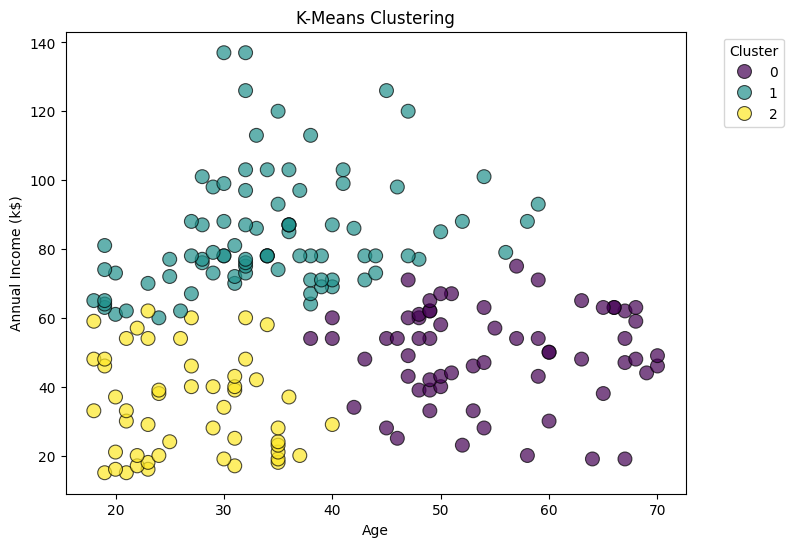

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#assuming 'data' already contains the cluster labels (from the kmeans model)
#we'll use 2 features To plot : 'carbon emission' and 'pollution_level'

plt.figure(figsize=(8,6))
#create a scatter plot wit cluster labels

sns.scatterplot(  x='Age',y='Annual Income (k$)',hue='cluster',data=data,palette='viridis',s=100,alpha=0.7,edgecolor='k')

#title and labels
plt.title('K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend(title='Cluster',bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()
